# Nonlinear Transformation of a Gaussian

Suppose that $\pmb{x} \sim N(\pmb{x_0}, P_x)$ is a Gaussian random variable with mean $\pmb{x_0}$ and covariance matrix $P_x$. If $f : \mathbb{R}^n \to \mathbb{R}^m$ is a nonlinear function, we would like to approximate the statistics of the non-Gaussian random variable
\begin{equation}
\pmb{y} = f(\pmb{x}) 
\end{equation}
There are many practical applications of this problem, particularly in Gaussian filters such as the unscented Kalman problem. Formally, the probability density of the random variable $\pmb{y}$ is given by 
\begin{equation}
P(\pmb{y}) = 
\begin{cases} 
      |J(\pmb{y})| N(f^{-1}(\pmb{y}) | \pmb{x_0}, P_x) & \text{ if } \pmb{y} = f(\pmb{x}) \text{ for some } \pmb{x} \\
      0 & \text{otherwise} 
\end{cases}
\end{equation}
where $|J(\pmb{y})|$ is the determinant of the Jacobian of $f^{-1}$. Technically this applies for strictly monotone differentiable functions $f$ \cite{Sarkka2013}. 

Below, we show a simple example of computing the PDF of a transformed Gaussian random variable analytically and via random sampling. In particular, we let $x \sim N(0, 1)$ and $f$ be the logistic function 
\begin{equation}
y = \mathcal{F}(x) = \frac{1}{1 + e^{-x}}.
\end{equation}

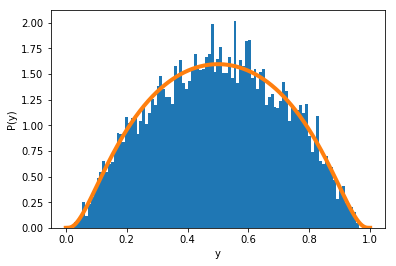

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plot.basic_plot

# Plot the probability distribution for y = f(x) 
# where f(x) is the logistic function and x ~ N(0,1)

# Probability density of x
def Px(x):
    return (1./np.sqrt(2.*np.pi)) * np.exp(-x**2 / 2.)

# Nonlinear function
def f(x):
    return 1. / (1. + np.exp(-x))

# Inverse of nonlinear function
def f_inv(x):
    return np.log(x / (1. - x))

# Probability density of y
def Py(y):
    # Determinant of Jacobian of F^{-1}(y) 
    Jy = (1. / y) + (1. / (1. - y))
    return Jy*Px(f_inv(y))

# Randomly sample from the distribution and plot a histogram 
x = np.random.randn(7500)
plt.hist(f(x), bins = 100, density = True)
# Plot the distribution computed analytically
y = np.linspace(1e-16, 1.0-1e-16, 1000)
plt.plot(y, Py(y))

plt.xlabel('y')
plt.ylabel('P(y)')

plt.show()


## Expected Value Integrals

Using the definition above is cumbersome and rarely practical for complicated nonlinear transformations. Typically, we are more interested in computing certain statistics of the random variable $\pmb{y}$, such as its mean and covariance. Enter the law of the unconscious statistician. 

As before, suppose that $\pmb{x}$ is a Gaussian random variable. We can compute the expected value or mean of $\pmb{y} = f(\pmb{x})$ denoted $E[\pmb{y}]$ without explicitly knowing its associated probability density function as follows

\begin{equation}
\label{eq:gwint}
E[\pmb{y}] = \int_{\mathbb{R}^n} f(\pmb{x}) N(\pmb{x} | \pmb{x_0}, P_x) d \pmb{x}.
\end{equation}

That is, $E[\pmb{y}]$ can be computed as a Gaussian weighted integral. Let's return to our logistic function example $y = f(x) = \frac{1}{1 + e^{-x}}$ and compute the expected value of $y$ using random sampling and numerical integration using the law of the unconscious statistician.

In [8]:
from scipy.integrate import quad

# Estimate expected value of y by random sampling
y_mean1 = f(x).mean()

# Estimate expected value of y using the result above 
# and numerical quadrature 
y_mean2 = quad(lambda x : f(x)*Px(x), -6., 6.)[0]

print("Random sampling estimate: {}".format(y_mean1))
print("Integral estimate: {}".format(y_mean2))

Random sampling estimate: 0.5014504701239816
Integral estimate: 0.49999999901341236


Covariance is also defined in terms of expected values integrals, and can therefore be approximated using similar weighted integrals. We will discuss covariance of a transformed random variable in more detail later. 
\begin{equation}
\text{Cov}[\pmb{y}] = E[(f(\pmb{x}) - E[f(\pmb{x})])(f(\pmb{x}) - E[f(\pmb{x})])^T]
\end{equation}


Given the importance of the expected value integrals in filtering applications, considerable effort has gone into efficiently estimating Gaussian weighted integrals of the form shown in Equation \ref{eq:gwint}. For a simple 1D problem, a basic quadrature rule suffices. However, for high dimensional problems, the number of points in standard quadrature rules grows exponentially, and estimating expected value integrals soon becomes intractable. In the next section, we'll show an example of an efficient method for computing Gaussian weighted integrals called the Unscented Transform. 